In [ ]:
from PyQt5.QtWidgets import *
import sys
 
class MyWindow(QWidget):
    def __init__(self):
        super().__init__()
        self.setupUI()
 
    def setupUI(self):
        self.setGeometry(200,200,200,200)
        self.setWindowTitle("Click")
 
        self.OnOpenDocument_Button = QPushButton("File Open")
        self.OnOpenDocument_Button.clicked.connect(self.OnOpenDocument)
        self.label = QLabel()
 
        layout = QVBoxLayout()
        layout.addWidget(self.OnOpenDocument_Button)
        layout.addWidget(self.label)
 
        self.setLayout(layout)
    
    def OnOpenDocument(self):
        fname = QFileDialog.getOpenFileName(self, 'Open file', "",
                                            "All Files(*);; Python Files(*.py)", '/home')
        if fname[0]:
            f = open(fname[0], 'r')
            flines = f.readlines()
 
            for line in flines:
                print(line)
        else:
            QMessageBox.about(self, "Warning", "파일을 선택하지 않았습니다.")

if __name__ == "__main__":
    app = QApplication(sys.argv)
    window = MyWindow()
    window.show()
    app.exec_()


In [ ]:
##보류

#img_id='BraTS19_2013_1_1'
#im = np.load(nimg)
#pred_stats = predict_3D_img_prob(nimg)
#pred = prediction_from_probabily_3D(pred_stats)
#show_pred_im(im[88], pred[88])

#Pyqt
from PyQt5.QtWidgets import *
from PyQt5 import uic
from PyQt5 import QtCore, QtGui, QtWidgets
import cv2
import time
import numpy as np
import datetime
import sys
from os import path
from flask import Flask
from collections import deque
from flask import Flask
from flask_ngrok import run_with_ngrok
from PyQt5.QtGui import QPixmap 

app = Flask(__name__)
#run_with_ngrok(app)

@app.route("/", methods=['POST', 'GET'])

#웹페이지 템플릿
def home(): 
    return '''
            <html lang="en">
            <head>
                <meta charset="UTF-8">
                <title>Brain_Tumor_Segmentation</title>

            </head>
            <body>
            <style>
            H1 {
              position: absolute;
              left: 245px;
              top: 100px;
              color:black;
            }
            H2 {
              position: absolute;
              left: 250px;
              top: 200px;
              color:black;
            }
            H3 {
              position: absolute;
              left: 420px;
              top: 650px;
              color:black;
            }
            </style>
            <H1>Brain Tumor Segmentation</H1>
            <H2>
            <p>
            <img src="loss_graph.PNG" width="400" height="400">
            </p>
            </H2>

            <H3><form action="/BTS/" method="post"><button name="forwardBtn" type="submit">BTS.exe</button></H3></form>
            </body>
            </html>
            '''

@app.route("/BTS/", methods=['POST', 'GET'])

#메인함수
def BTS():
    #UI파일 연결
    #단, UI파일은 Python 코드 파일과 같은 디렉토리에 위치해야한다.
    form_class = uic.loadUiType("BTS_controller.ui")[0]
    ul = False

    #화면을 띄우는데 사용되는 Class 선언
    class WindowClass(QMainWindow, form_class) :

        def __init__(self) :

            super().__init__()
            self.setupUi(self)

            #버튼에 기능을 연결하는 코드
            self.pushButton.clicked.connect(self.MRI_Upload)
            
            #Graphic View에 결과창 띄우기
            self.graphicsView.rubberBandChanged.connect("pick.png")
            
        def init_ui(self, f):
            self.setMinimumWidth(320) 
            self.setMinimumHeight(240) 
            layout = QBoxLayout(QBoxLayout.TopToBottom) 
            self.setLayout(layout) 
            pixmap = QPixmap(f) 
            pixmap = pixmap.scaledToHeight(240)  # 사이즈가 조정 
            self.lb_1.setPixmap(pixmap) 
            layout.addWidget(self.lb_1) 
            
        #Brain_Tumor_Segmentation
        def BTS_Service(self):
            global ul
            
            ul = False

            while True:
                if(ul == True):
                    init_ui(f)

                if not ret:
                    break

            cv2.destroyAllWindows()
                
        #MRI_Segmentation_Result
        def MRI_Result(f):
            global ul
            #img_id='BraTS19_2013_1_1'
            #nimg = os.path.join(VALIDATION_NUMPY_DIR, img_id+'.npy')
            nimg = f
            im = np.load(nimg)
            pred_stats = predict_3D_img_prob(nimg)
            pred = prediction_from_probabily_3D(pred_stats)
            show_pred_im(im[88], pred[88])
            ul = False
            
        #파일 업로드
        def MRI_Upload(self):
            global ul
            ul = True
            global f
            fname = QFileDialog.getOpenFileName(self, 'Open file', '/')
            if fname[0]:

                #f = open(fname[0], 'r', encoding='UTF-8')
                #flines = f.readlines()
                f = fname
                return f

               # for line in flines:
                #    print(line)
                #nimg = os.path.join(VALIDATION_NUMPY_DIR, img_id+'.npy')
                #im = np.load(f)
                #pred_stats = predict_3D_img_prob(nimg)
                #pred = prediction_from_probabily_3D(pred_stats)
                #show_pred_im(im[88], pred[88])
                
            else:
                QMessageBox.about(self, "Warning", "파일을 선택하지 않았습니다.")
               #return 0
         
        #이미지 보이기
        '''
        def loadImageFromFile(self) :
            #QPixmap 객체 생성 후 이미지 파일을 이용하여 QPixmap에 사진 데이터 Load하고, Label을 이용하여 화면에 표시
            self.qPixmapFileVar = QPixmap()
            self.qPixmapFileVar.load("pick.png")
            self.qPixmapFileVar = self.qPixmapFileVar.scaledToWidth(600)
            self.lbl_picture.setPixmap(self.qPixmapFileVar)
        '''

    if __name__ == "__main__" :
        app = QApplication(sys.argv)
        mw = WindowClass() 
        mw.show()
        app.exec_()
        
    return home()
        
if __name__ == "__main__" :
    app.run()

In [2]:
import sys
import urllib.request
from PyQt5.QtWidgets import *
from PyQt5.QtCore import *
from PyQt5.QtGui import *
from PyQt5 import uic

form_class = uic.loadUiType("pixmapTest.ui")[0]

class WindowClass(QMainWindow, form_class) :
    def __init__(self) :
        super().__init__()
        self.setupUi(self)

        self.btn_loadFromFile.clicked.connect(self.loadImageFromFile)
        self.btn_loadFromWeb.clicked.connect(self.loadImageFromWeb)
        self.btn_savePicture.clicked.connect(self.saveImageFromWeb)

    def loadImageFromFile(self) :
        #QPixmap 객체 생성 후 이미지 파일을 이용하여 QPixmap에 사진 데이터 Load하고, Label을 이용하여 화면에 표시
        self.qPixmapFileVar = QPixmap()
        self.qPixmapFileVar.load("pick.png")
        self.qPixmapFileVar = self.qPixmapFileVar.scaledToWidth(600)
        self.lbl_picture.setPixmap(self.qPixmapFileVar)

    def loadImageFromWeb(self) :

        #Web에서 Image 정보 로드
        urlString = "https://avatars1.githubusercontent.com/u/44885477?s=460&v=4"
        imageFromWeb = urllib.request.urlopen(urlString).read()

        #웹에서 Load한 Image를 이용하여 QPixmap에 사진데이터를 Load하고, Label을 이용하여 화면에 표시
        self.qPixmapWebVar = QPixmap()
        self.qPixmapWebVar.loadFromData(imageFromWeb)
        self.qPixmapWebVar = self.qPixmapWebVar.scaledToWidth(600)
        self.lbl_picture.setPixmap(self.qPixmapWebVar)

    def saveImageFromWeb(self) :
        #Label에서 표시하고 있는 사진 데이터를 QPixmap객체의 형태로 반환받은 후, save함수를 이용해 사진 저장
        self.qPixmapSaveVar = self.lbl_picture.pixmap()
        self.qPixmapSaveVar.save("SavedImage.jpg")


if __name__ == "__main__" :
    app = QApplication(sys.argv)
    myWindow = WindowClass()
    myWindow.show()

In [1]:
 #!/usr/bin/env python 
 # coding: utf-8 
 
 
 # 예제 내용 
 # * QPixmap사용 
 
# 
import sys
from PyQt5.QtWidgets import QWidget 
from PyQt5.QtWidgets import QLabel 
from PyQt5.QtWidgets import QBoxLayout 
from PyQt5.QtWidgets import QApplication 
from PyQt5.QtGui import QPixmap 


#__author__ = "Deokyu Lim <hong18s@gmail.com>" 




class Window(QWidget): 
    def __init__(self): 
        QWidget.__init__(self) 
        self.lb_1 = QLabel() 
        self.init_ui() 


    def init_ui(self): 
        self.setMinimumWidth(320) 
        self.setMinimumHeight(240) 
        layout = QBoxLayout(QBoxLayout.TopToBottom) 
        self.setLayout(layout) 
        pixmap = QPixmap("pick.jpeg") 
        pixmap = pixmap.scaledToHeight(240)  # 사이즈가 조정 
        self.lb_1.setPixmap(pixmap) 


        layout.addWidget(self.lb_1) 


if __name__ == "__main__": 
    app = QApplication(sys.argv) 
    form = Window() 
    form.show() 
    exit(app.exec_()) 


In [1]:
from PySide2 import QtCore, QtGui, QtWidgets

class PixmapItem(QtWidgets.QGraphicsWidget):
    def __init__(self, image, parent=None):
        super(PixmapItem, self).__init__(parent)
        self.pic = QtGui.QPixmap(image)

    def boundingRect(self):
        return QtCore.QRectF(self.pic.rect())

    def sizeHint(self, which, constraint=QtCore.QSizeF()):
        return self.boundingRect().size()

    def paint(self, painter, option, widget):
        painter.drawPixmap(QtCore.QPoint(), self.pic)

class GraphicsScene(QtWidgets.QGraphicsScene):
    def drawBackground(self, painter, rect):
        bg_brush = QtGui.QBrush(QtGui.QColor(255, 255, 255), QtCore.Qt.SolidPattern)
        painter.fillRect(rect, bg_brush)
        #Red bar on top
        painter.setPen(QtGui.QPen(QtCore.Qt.NoPen))
        brush = QtGui.QBrush(QtGui.QColor(139, 0, 0), QtCore.Qt.SolidPattern)
        r = QtCore.QRectF(rect)
        r.setY(0)
        r.setHeight(30)
        painter.fillRect(r, brush)

class GraphicsView(QtWidgets.QGraphicsView):
    def adjust_scene(self):
        if self.scene() is None: return
        r = self.scene().itemsBoundingRect()
        view_rect = self.mapToScene(self.viewport().rect()).boundingRect()
        w = max(r.size().width(), view_rect.size().width())
        h = max(r.size().height(), view_rect.size().height())
        self.scene().setSceneRect(QtCore.QRectF(QtCore.QPointF(), QtCore.QSizeF(w, h)))

    def resizeEvent(self, event):
        super(GraphicsView, self).resizeEvent(event)
        self.adjust_scene()

class Widget(QtWidgets.QWidget):
    def __init__(self, parent=None):
        super(Widget, self).__init__(parent)
        self.load_button = QtWidgets.QPushButton(text="Load")
        self.load_button.clicked.connect(self.load)
        self.column_spinbox = QtWidgets.QSpinBox(
            value=4,
            minimum=1,
            maximum=25,
            enabled=False
        )
        self.column_spinbox.valueChanged[int].connect(self.set_columns)
        self.scene = GraphicsScene()
        self.view = GraphicsView(self.scene)
        lay = QtWidgets.QVBoxLayout(self)
        hlay = QtWidgets.QHBoxLayout()
        hlay.addWidget(self.load_button)
        hlay.addWidget(self.column_spinbox)
        lay.addLayout(hlay)
        lay.addWidget(self.view)

    @QtCore.Slot()
    def load(self):
        self.imglist = ["pick.jpeg"]
        self.set_columns(self.column_spinbox.value())
        self.column_spinbox.setEnabled(True)

    @QtCore.Slot(int)
    def set_columns(self, column):
        self.view.scene().clear()
        item = self.scene.addText("Some Sample Text.", QtGui.QFont("Arial", 16, QtGui.QFont.Light))
        item.setDefaultTextColor(QtGui.QColor(255, 255, 255))

        top = item.mapToScene(item.boundingRect().bottomLeft())
        self.graphics_widget = QtWidgets.QGraphicsWidget()
        graphics_layout = QtWidgets.QGraphicsGridLayout(self.graphics_widget)
        self.view.scene().addItem(self.graphics_widget)
        self.graphics_widget.setPos(top)

        for i, img in enumerate(self.imglist):
            item = PixmapItem(img)
            row, col = divmod(i, column)
            graphics_layout.addItem(item, row, col)
            graphics_layout.setColumnSpacing(column, 15)
            graphics_layout.setRowSpacing(row, 15)
        QtCore.QTimer.singleShot(0, self.view.adjust_scene)

if __name__ == '__main__':
    import sys
    app = QtWidgets.QApplication(sys.argv)
    w = Widget()
    w.show()
    sys.exit(app.exec_())

ModuleNotFoundError: No module named 'PySide2'

In [1]:
#!/usr/bin/env python


#############################################################################
##
## Copyright (C) 2013 Riverbank Computing Limited.
## Copyright (C) 2010 Nokia Corporation and/or its subsidiary(-ies).
## All rights reserved.
##
## This file is part of the examples of PyQt.
##
## $QT_BEGIN_LICENSE:BSD$
## You may use this file under the terms of the BSD license as follows:
##
## "Redistribution and use in source and binary forms, with or without
## modification, are permitted provided that the following conditions are
## met:
##   * Redistributions of source code must retain the above copyright
##     notice, this list of conditions and the following disclaimer.
##   * Redistributions in binary form must reproduce the above copyright
##     notice, this list of conditions and the following disclaimer in
##     the documentation and/or other materials provided with the
##     distribution.
##   * Neither the name of Nokia Corporation and its Subsidiary(-ies) nor
##     the names of its contributors may be used to endorse or promote
##     products derived from this software without specific prior written
##     permission.
##
## THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS
## "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT
## LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR
## A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT
## OWNER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL,
## SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT
## LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE,
## DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY
## THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
## (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
## OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE."
## $QT_END_LICENSE$
##
#############################################################################


from PyQt5.QtCore import QDir, Qt
from PyQt5.QtGui import QImage, QPainter, QPalette, QPixmap
from PyQt5.QtWidgets import (QAction, QApplication, QFileDialog, QLabel,
        QMainWindow, QMenu, QMessageBox, QScrollArea, QSizePolicy)
from PyQt5.QtPrintSupport import QPrintDialog, QPrinter


class ImageViewer(QMainWindow):
    def __init__(self):
        super(ImageViewer, self).__init__()

        self.printer = QPrinter()
        self.scaleFactor = 0.0

        self.imageLabel = QLabel()
        self.imageLabel.setBackgroundRole(QPalette.Base)
        self.imageLabel.setSizePolicy(QSizePolicy.Ignored, QSizePolicy.Ignored)
        self.imageLabel.setScaledContents(True)

        self.scrollArea = QScrollArea()
        self.scrollArea.setBackgroundRole(QPalette.Dark)
        self.scrollArea.setWidget(self.imageLabel)
        self.setCentralWidget(self.scrollArea)

        self.createActions()
        self.createMenus()

        self.setWindowTitle("Image Viewer")
        self.resize(500, 400)

    def open(self):
        fileName, _ = QFileDialog.getOpenFileName(self, "Open File",
                QDir.currentPath())
        if fileName:
            image = QImage(fileName)
            if image.isNull():
                QMessageBox.information(self, "Image Viewer",
                        "Cannot load %s." % fileName)
                return

            self.imageLabel.setPixmap(QPixmap.fromImage(image))
            self.scaleFactor = 1.0

            self.printAct.setEnabled(True)
            self.fitToWindowAct.setEnabled(True)
            self.updateActions()

            if not self.fitToWindowAct.isChecked():
                self.imageLabel.adjustSize()

    def print_(self):
        dialog = QPrintDialog(self.printer, self)
        if dialog.exec_():
            painter = QPainter(self.printer)
            rect = painter.viewport()
            size = self.imageLabel.pixmap().size()
            size.scale(rect.size(), Qt.KeepAspectRatio)
            painter.setViewport(rect.x(), rect.y(), size.width(), size.height())
            painter.setWindow(self.imageLabel.pixmap().rect())
            painter.drawPixmap(0, 0, self.imageLabel.pixmap())

    def zoomIn(self):
        self.scaleImage(1.25)

    def zoomOut(self):
        self.scaleImage(0.8)

    def normalSize(self):
        self.imageLabel.adjustSize()
        self.scaleFactor = 1.0

    def fitToWindow(self):
        fitToWindow = self.fitToWindowAct.isChecked()
        self.scrollArea.setWidgetResizable(fitToWindow)
        if not fitToWindow:
            self.normalSize()

        self.updateActions()

    def about(self):
        QMessageBox.about(self, "About Image Viewer",
                "<p>The <b>Image Viewer</b> example shows how to combine "
                "QLabel and QScrollArea to display an image. QLabel is "
                "typically used for displaying text, but it can also display "
                "an image. QScrollArea provides a scrolling view around "
                "another widget. If the child widget exceeds the size of the "
                "frame, QScrollArea automatically provides scroll bars.</p>"
                "<p>The example demonstrates how QLabel's ability to scale "
                "its contents (QLabel.scaledContents), and QScrollArea's "
                "ability to automatically resize its contents "
                "(QScrollArea.widgetResizable), can be used to implement "
                "zooming and scaling features.</p>"
                "<p>In addition the example shows how to use QPainter to "
                "print an image.</p>")

    def createActions(self):
        self.openAct = QAction("&Open...", self, shortcut="Ctrl+O",
                triggered=self.open)

        self.printAct = QAction("&Print...", self, shortcut="Ctrl+P",
                enabled=False, triggered=self.print_)

        self.exitAct = QAction("E&xit", self, shortcut="Ctrl+Q",
                triggered=self.close)

        self.zoomInAct = QAction("Zoom &In (25%)", self, shortcut="Ctrl++",
                enabled=False, triggered=self.zoomIn)

        self.zoomOutAct = QAction("Zoom &Out (25%)", self, shortcut="Ctrl+-",
                enabled=False, triggered=self.zoomOut)

        self.normalSizeAct = QAction("&Normal Size", self, shortcut="Ctrl+S",
                enabled=False, triggered=self.normalSize)

        self.fitToWindowAct = QAction("&Fit to Window", self, enabled=False,
                checkable=True, shortcut="Ctrl+F", triggered=self.fitToWindow)

        self.aboutAct = QAction("&About", self, triggered=self.about)

        self.aboutQtAct = QAction("About &Qt", self,
                triggered=QApplication.instance().aboutQt)

    def createMenus(self):
        self.fileMenu = QMenu("&File", self)
        self.fileMenu.addAction(self.openAct)
        self.fileMenu.addAction(self.printAct)
        self.fileMenu.addSeparator()
        self.fileMenu.addAction(self.exitAct)

        self.viewMenu = QMenu("&View", self)
        self.viewMenu.addAction(self.zoomInAct)
        self.viewMenu.addAction(self.zoomOutAct)
        self.viewMenu.addAction(self.normalSizeAct)
        self.viewMenu.addSeparator()
        self.viewMenu.addAction(self.fitToWindowAct)

        self.helpMenu = QMenu("&Help", self)
        self.helpMenu.addAction(self.aboutAct)
        self.helpMenu.addAction(self.aboutQtAct)

        self.menuBar().addMenu(self.fileMenu)
        self.menuBar().addMenu(self.viewMenu)
        self.menuBar().addMenu(self.helpMenu)

    def updateActions(self):
        self.zoomInAct.setEnabled(not self.fitToWindowAct.isChecked())
        self.zoomOutAct.setEnabled(not self.fitToWindowAct.isChecked())
        self.normalSizeAct.setEnabled(not self.fitToWindowAct.isChecked())

    def scaleImage(self, factor):
        self.scaleFactor *= factor
        self.imageLabel.resize(self.scaleFactor * self.imageLabel.pixmap().size())

        self.adjustScrollBar(self.scrollArea.horizontalScrollBar(), factor)
        self.adjustScrollBar(self.scrollArea.verticalScrollBar(), factor)

        self.zoomInAct.setEnabled(self.scaleFactor < 3.0)
        self.zoomOutAct.setEnabled(self.scaleFactor > 0.333)

    def adjustScrollBar(self, scrollBar, factor):
        scrollBar.setValue(int(factor * scrollBar.value()
                                + ((factor - 1) * scrollBar.pageStep()/2)))


if __name__ == '__main__':

    import sys

    app = QApplication(sys.argv)
    imageViewer = ImageViewer()
    imageViewer.show()
    sys.exit(app.exec_())

SystemExit: 0

C:\Users\student\.conda\envs\test\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [15]:
from PIL import Image
import numpy as np


#data = np.zeros((h, w, 3), dtype=np.uint8)
data = 'C:/Users/student/Desktop/Naomi_dataset/train_numpy_images/BraTS19_2013_1_1.npy'
im = np.load(data)
print(im)

[[[[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   ...
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   ...
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   ...
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  ...

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   ...
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   ...
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   ...
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]]


 [[[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   ...
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   ...
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   ...
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0

In [30]:
print(im.shape)

(155, 240, 240, 4)


In [38]:
p = im[88,:,:,1]

In [39]:
print(p.shape)

(240, 240)


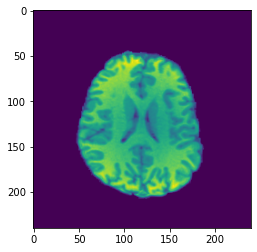

In [40]:
import matplotlib.pyplot as plt
plt.imshow(p)

In [41]:
img = Image.fromarray(p, 'RGB')
img.save('my.png')
img.show()

In [71]:
import os

def fill_df_from_path(f):
    s = os.path.splitext(f)[0]
    print(s)

    nimg = os.path.join("./pred_ing/"+s+'.npy')
    out_img = os.path.join("./pred_ing/"+s+'_pred.npy')
    
    a = np.save(nimg, f)
    b = np.save(out_img, f)
    
    df = [a, b]
    
    return df

x = "pile.nii"
a = fill_df_from_path(x)
print(a[0])
print(a[1])

pile
None
None


In [45]:
import os


# 패스에서 파일명만 구하기: 확장자 제외
s = os.path.splitext("/My Jukebox/Cool Jazz.mp3")
s = os.path.split(s[0])
print(s[1])

Cool Jazz
